In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
/kaggle/input/xgboost/5525447_1593423035_XG.jpg
/kaggle/input/image1/5dc8b4b49d6ba27f937251ab52f380.jpeg


In the realm of corporate banking, understanding and preventing client churn is crucial for sustained success. "Bank churning" refers to clients ending their banking relationships, potentially causing financial setbacks. Introducing a predictive model using XGBoost, our initiative aims to foresee churn early, allowing timely interventions. Through exploratory data analysis and hyperparameter tuning, we're deciphering hidden patterns in data to gain insights into client behavior. This predictive tool goes beyond reacting to issues; it's a proactive approach for banking institutions to retain clients by foreseeing potential challenges. This project is not just about technology but represents a commitment to strengthening banking operations, optimizing resources, and building enduring client relationships. As we embark on this journey, we envision a model that transforms data into actionable intelligence, equipping corporate banks to navigate challenges with foresight and efficiency.

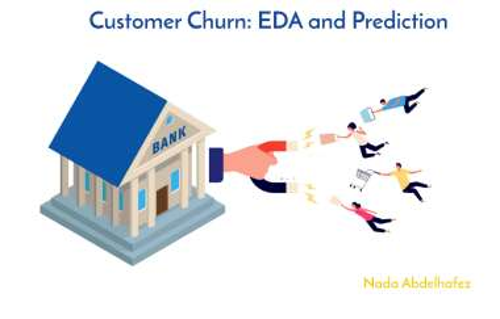

In [2]:
from PIL import Image
import IPython.display as display

# Load the image
image_path = '/kaggle/input/image1/5dc8b4b49d6ba27f937251ab52f380.jpeg'
img = Image.open(image_path)

# Resize the image (e.g., to a width of 500 pixels)
width, height = 500, int((500 / img.width) * img.height)
resized_img = img.resize((width, height))

# Display the resized image
display.display(resized_img)


Source: Prezi (https://prezi.com/)

# **1. Data Exploration**

**1.1 Overview**

> The dataset chosen for this analysis is sourced from a Kaggle-hosted Playground Series competition. Skillfully curated, the dataset is meticulously crafted to enhance the competitiveness of challenges, featuring both training and test sets. Its deliberate design showcases a commitment to providing well-structured data for engaging competitions. The dataset stands out for its thoughtful creation, facilitating an enjoyable competition experience. Leveraging synthetic data generation techniques, it seamlessly incorporates real-world features while safeguarding the confidentiality of test labels. 

In [3]:
import pandas as pd

train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
submission_data = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

 **1.2 Structure**

> The dataset consists of 165,034 entries in the training set and 110,023 entries in the test set, each comprising 13 features, excluding the target variable. Each customer is uniquely identified by a Customer ID, along with essential details including Surname, Credit Score, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary. The crucial target variable, Exited, indicates customer churn. 

In [4]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 t

In [5]:
print(train_data.shape)

print(test_data.shape)

(165034, 14)
(110023, 13)


**1.3 Summary Statistics**

> yet to find something about the notable patterns and outliers

In [6]:
print(train_data.describe())
print(test_data.describe())

                id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.

# **1.4 Missing Values**
 
 **There are no missing values in both the training and test datasets. This means every piece of information for each customer is complete, making the datasets reliable for analysis**


In [7]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


# **1.5 Distribution of features**
**The distribution of features in the dataset significantly contributes to the analysis. It helps in understanding the various characteristics and patterns present. By looking at how the data is spread across different features, one can spot trends, outliers, and potential connections between variables. This knowledge is crucial for making informed decisions during data processing and selecting appropriate models.**

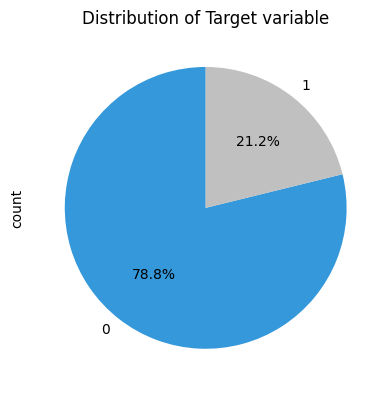

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining colors
colors = ['#3498db', '#c0c0c0']

# Plotting pie chart for train dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Target variable')


# Display the plots
plt.show()


<Figure size 1000x600 with 0 Axes>

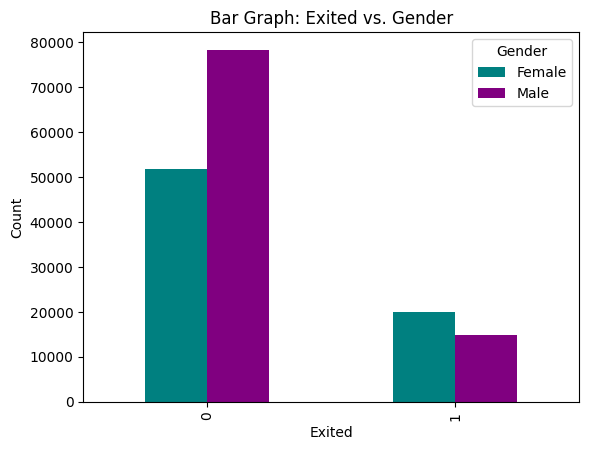

In [9]:
import matplotlib.pyplot as plt

# Creating a side-by-side bar graph with 'Exited' on the x-axis
plt.figure(figsize=(10, 6))
train_data.groupby(['Exited', 'Gender']).size().unstack().plot(kind='bar', color=['#008080', '#800080']
)
plt.title('Bar Graph: Exited vs. Gender')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'], bbox_to_anchor=(1, 1))

# Show the plot
plt.show()



**Looking at gender and customer churn, it seems like males are less stable and more likely to leave. This tells us that gender might be important in figuring out how to keep customers, especially focusing on strategies for males.**

In [10]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


/tmp/ipykernel_18/1671847355.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[train_data['Exited'] == 0]['Age'], label='Exited', shade=True, color='#e74c3c')
/tmp/ipykernel_18/1671847355.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[train_data['Exited'] == 1]['Age'], label='Not Exited', shade=True, color='#3498db')


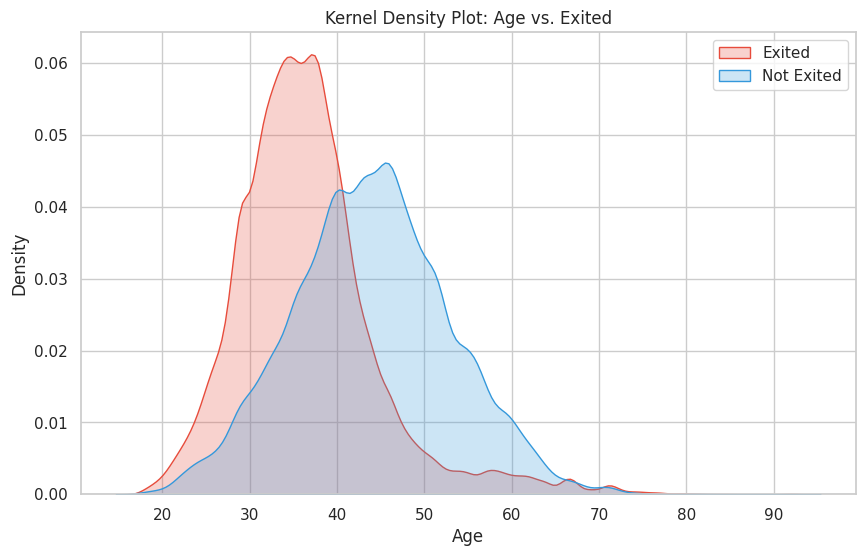

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style for the plot
sns.set(style="whitegrid")

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(train_data[train_data['Exited'] == 0]['Age'], label='Exited', shade=True, color='#e74c3c')
sns.kdeplot(train_data[train_data['Exited'] == 1]['Age'], label='Not Exited', shade=True, color='#3498db')

# Set plot labels and title
plt.title('Kernel Density Plot: Age vs. Exited')
plt.xlabel('Age')
plt.ylabel('Density')

# Display the legend
plt.legend()

# Show the plot
plt.show()


**Individuals in their mid-30s appear to be more prone to leaving, whereas those in their 40s exhibit greater loyalty. This age-based trend suggests a potential correlation between age groups and customer loyalty, indicating the importance of tailoring retention strategies based on different age demographics for effective customer management.**

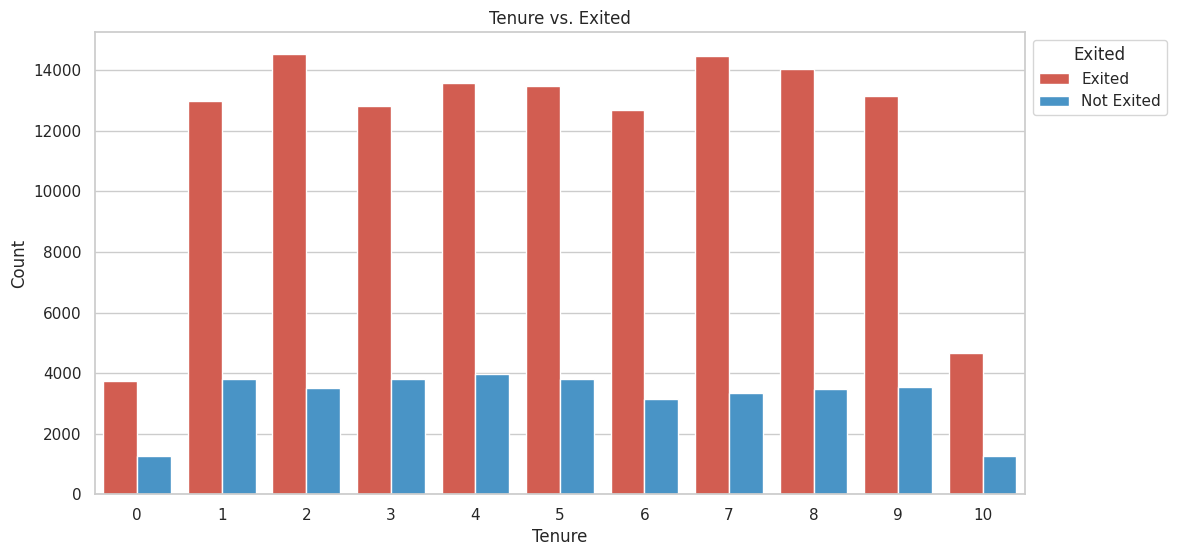

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a side-by-side bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Tenure', hue='Exited', data=train_data, palette=['#e74c3c', '#3498db'])

# Set plot labels and title
plt.title('Tenure vs. Exited')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Exited', 'Not Exited'], bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


**It appears that the target variable is evenly distributed across different tenures. This suggests that the likelihood of customer churn is relatively consistent regardless of the number of years a customer has been with the company.**

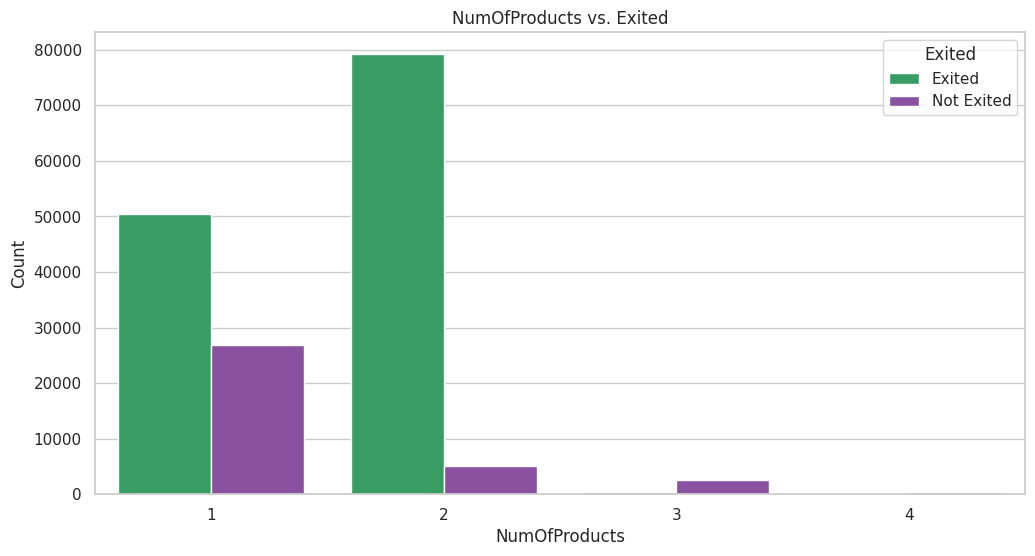

In [13]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a side-by-side bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=train_data, palette=['#27ae60', '#8e44ad'])

# Set plot labels and title
plt.title('NumOfProducts vs. Exited')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Exited', 'Not Exited'], bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


**Customers utilizing multiple services seem to display a higher likelihood of dissatisfaction.**

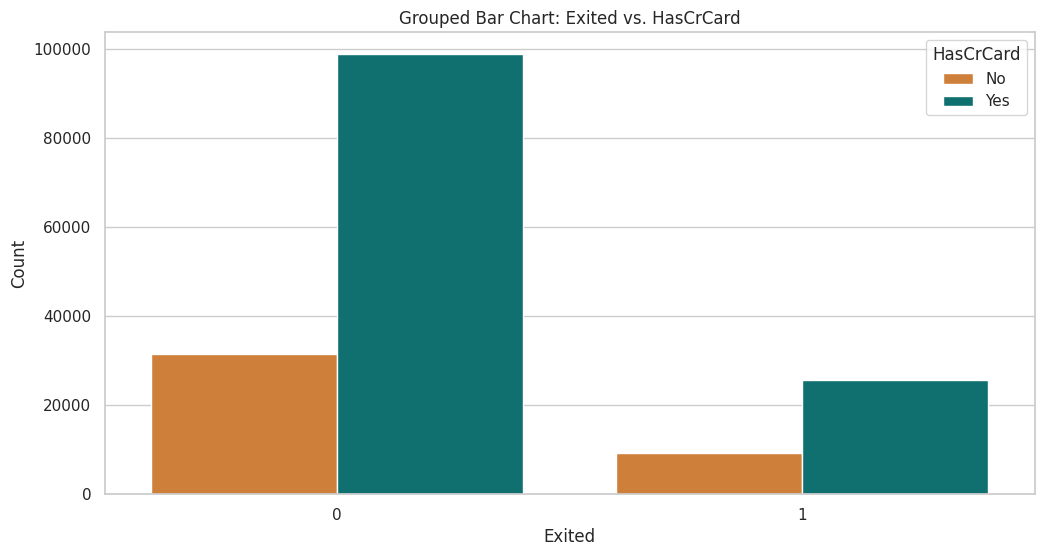

In [14]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Exited', hue='HasCrCard', data=train_data, palette=['#e67e22', '#008080'])

# Set plot labels and title
plt.title('Grouped Bar Chart: Exited vs. HasCrCard')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.legend(title='HasCrCard', labels=['No', 'Yes'], bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


**Individuals who use and those who don't use credit cards exhibit similar behavior. This observation suggests that credit card usage may not be a significant factor influencing the observed behavior.**

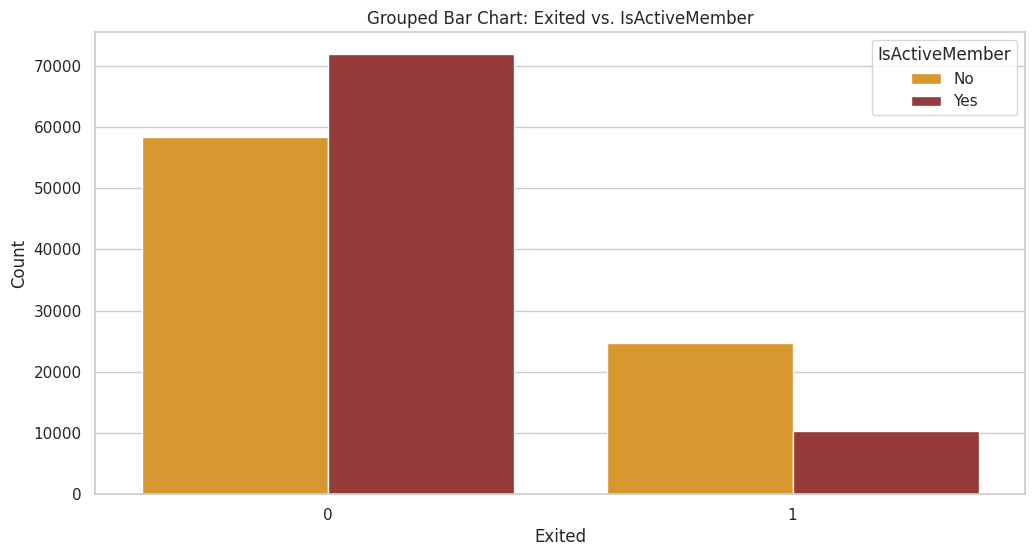

In [15]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Exited', hue='IsActiveMember', data=train_data, palette=['#f39c12', '#a52a2a'])

# Set plot labels and title
plt.title('Grouped Bar Chart: Exited vs. IsActiveMember')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.legend(title='IsActiveMember', labels=['No', 'Yes'], bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


**Customers who use services more frequently appear to be more likely to leave. The trend suggests that competitors might be providing more services or better features. This observation implies that customers may be attracted to competitors due to enhanced offerings. Analyzing this trend is crucial for the company to adapt and stay competitive, potentially by improving existing services or introducing new features to meet customer expectations. check the connection between the sentence**

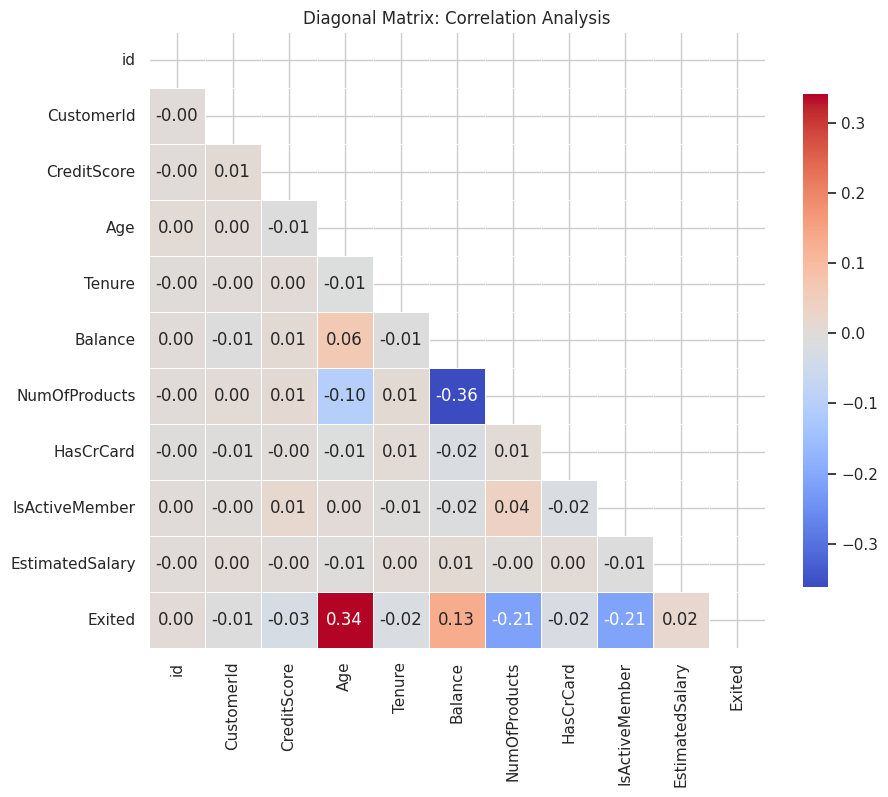

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numerical columns
numerical_variables = train_data.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numerical_variables.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Setting up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# The heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Diagonal Matrix: Correlation Analysis')

# Show the plot
plt.show()


**As evident from the Exploratory Data Analysis (EDA), age emerges as the most influential variable for the target variable. Following closely are the number of products and active member variables, ranking as the second most influential based on correlation matrices. These findings highlight key factors impacting customer churn and provide valuable insights for further analysis and model development.**

# **2. Modelling**

# **2.1 Model**

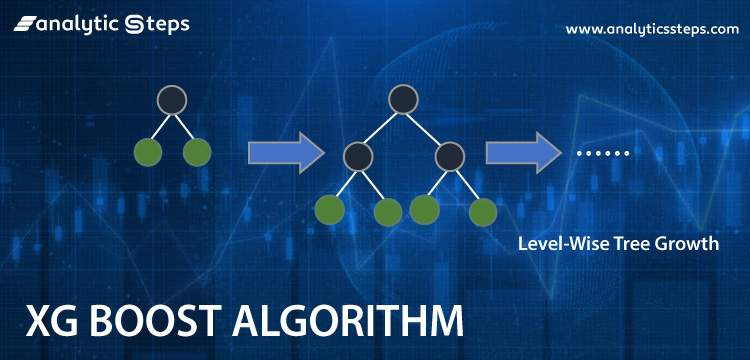

In [17]:
from PIL import Image
import IPython.display as display

# Loading the image
image_path = '/kaggle/input/xgboost/5525447_1593423035_XG.jpg'
img = Image.open(image_path)

# Display the image
display.display(img)


Source: Analytics Steps. (Year). Introduction to XGBoost Algorithm for Classification and Regression. Analytics Steps. https://www.analyticssteps.com/blogs/introduction-xgboost-algorithm-classification-and-regression

**Given the popularity of boosting methods for addressing class imbalance and skewness, we have opted for XGBoost as our model. XGBoost's robustness in handling such challenges, coupled with its high predictive accuracy, makes it a suitable choice for our analysis. This decision aligns with the goal of effectively capturing patterns within imbalanced data, ultimately enhancing the model's performance in predicting customer churn.**

# **2.2 Data Preperation**

**Cleaning up the data by removing things that don't really matter, Which increases computing power and results in a better model.**

In [18]:
X = train_data.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = train_data['Exited']
test_data = test_data.drop(['id', 'CustomerId', 'Surname'], axis=1)

# **2.3 Labels Encoding**

**Like many other machine learning models, requires categorical variables to be encoded into numerical format.**

There are different methods for encoding categorical variables:

**Label Encoding:**

Assign a unique integer to each category. This method is suitable for ordinal categorical variables where the order matters.

**One-Hot Encoding:**

Create binary columns for each category, indicating its presence or absence. This method is suitable for nominal categorical variables.

**Binary Encoding:**

Combine the benefits of label encoding and one-hot encoding by creating binary codes for each category.

**Ordinal Encoding:**

Assign integer values to categories based on their ordinal relationship.

In [19]:
X_train_encoded = pd.get_dummies(X, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])
X_test_encoded = pd.get_dummies(test_data, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

# **3.3 Splitting Data**

**In splitting the data into test and train sets with a ratio of 20-80, the Stratified Shuffle Split method is employed to address class imbalance. This ensures an equal distribution of classes in both the test and train splits, enhancing the model's ability to learn from diverse examples and improving overall performance.**

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initializing StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Spliting the data
for train_index, test_index in sss.split(X_train_encoded, y):
    X_train, X_test = X_train_encoded.iloc[train_index], X_train_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# **3.4 Base model**

In [21]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model on the training data
xgb_classifier.fit(X_train, y_train, 
                   verbose=True,                  
                   early_stopping_rounds=10,
                   eval_metric='aucpr',           
                   eval_set=[(X_test, y_test)])

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.69347
[1]	validation_0-aucpr:0.70748
[2]	validation_0-aucpr:0.71231
[3]	validation_0-aucpr:0.71553
[4]	validation_0-aucpr:0.71803
[5]	validation_0-aucpr:0.72021
[6]	validation_0-aucpr:0.72245
[7]	validation_0-aucpr:0.72284
[8]	validation_0-aucpr:0.72318
[9]	validation_0-aucpr:0.72400
[10]	validation_0-aucpr:0.72447
[11]	validation_0-aucpr:0.72470
[12]	validation_0-aucpr:0.72543
[13]	validation_0-aucpr:0.72582
[14]	validation_0-aucpr:0.72591
[15]	validation_0-aucpr:0.72590
[16]	validation_0-aucpr:0.72626
[17]	validation_0-aucpr:0.72662
[18]	validation_0-aucpr:0.72639
[19]	validation_0-aucpr:0.72656
[20]	validation_0-aucpr:0.72622
[21]	validation_0-aucpr:0.72643
[22]	validation_0-aucpr:0.72641
[23]	validation_0-aucpr:0.72639
[24]	validation_0-aucpr:0.72658
[25]	validation_0-aucpr:0.72644
[26]	validation_0-aucpr:0.72641
[27]	validation_0-aucpr:0.72640


# **3.5 Evaluating the Model**

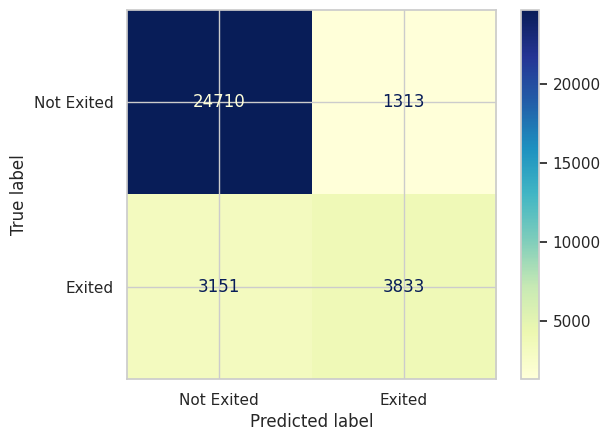

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

from sklearn.metrics import ConfusionMatrixDisplay

# Assuming 'cm' is your confusion matrix
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Exited', 'Exited'])

# Customize the colors using the cmap parameter
conf_matrix_display.plot(cmap='YlGnBu')  # You can choose a different colormap that suits your preference

plt.show()


# **4. Hyperparameter Tuning**

# **4.1 GridSearchCV**

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.01, 0.1],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}

optimal_parameters = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=3,
    n_jobs=10,
    cv=3
)

optimal_parameters.fit(X_train,
                       y_train,
                       early_stopping_rounds=10,
                       eval_metric='auc',
                       eval_set=[(X_test, y_test)],
                       verbose=False)

print(optimal_parameters)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=5;, score=0.883 total time=  12.1s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1.0, scale_pos_weight=1;, score=0.883 total time=  13.9s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10.0, scale_pos_weight=3;, score=0.883 total time=  13.2s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5;, score=0.885 total time=  14.3s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1.0, scale_pos_weight=5;, score=0.892 total time=  14.7s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10.0, scale_pos_weight=5;, score=0.892 total time=  14.0s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1.0, scale_pos_weight=1;, score=0.886 total time=  15.2s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=10.0, scale_pos_weight=1;, score=0.885 total time=  15.1s
[CV 2/3] END gamm

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1;, score=0.890 total time=  12.2s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1.0, scale_pos_weight=3;, score=0.890 total time=  13.9s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10.0, scale_pos_weight=5;, score=0.883 total time=  13.0s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5;, score=0.892 total time=  14.5s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10.0, scale_pos_weight=1;, score=0.885 total time=  14.4s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pos_weight=1;, score=0.886 total time=  15.1s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1.0, scale_pos_weight=1;, score=0.886 total time=  16.1s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=10.0, scale_pos_weight=3;, score=0.885 total time=  15.0s
[CV 2/3] END gamma=

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=5;, score=0.889 total time=  12.2s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10.0, scale_pos_weight=1;, score=0.883 total time=  13.5s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10.0, scale_pos_weight=5;, score=0.889 total time=  13.0s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1.0, scale_pos_weight=1;, score=0.885 total time=  15.0s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10.0, scale_pos_weight=1;, score=0.885 total time=  14.6s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pos_weight=1;, score=0.893 total time=  15.1s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.886 total time=  15.8s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=10.0, scale_pos_weight=3;, score=0.886 total time=  14.7s
[CV 3/3] END gam

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=3;, score=0.890 total time=  11.8s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1.0, scale_pos_weight=3;, score=0.883 total time=  13.7s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10.0, scale_pos_weight=3;, score=0.883 total time=  13.2s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=3;, score=0.892 total time=  14.3s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1.0, scale_pos_weight=5;, score=0.885 total time=  14.9s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pos_weight=1;, score=0.886 total time=  15.4s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1.0, scale_pos_weight=1;, score=0.893 total time=  13.5s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1.0, scale_pos_weight=5;, score=0.893 total time=  15.2s
[CV 1/3] END gamma=0,

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1;, score=0.883 total time=  12.1s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1.0, scale_pos_weight=3;, score=0.883 total time=  13.0s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10.0, scale_pos_weight=1;, score=0.890 total time=  13.1s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=3;, score=0.885 total time=  13.8s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1.0, scale_pos_weight=3;, score=0.885 total time=  14.7s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10.0, scale_pos_weight=3;, score=0.892 total time=  14.0s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pos_weight=5;, score=0.885 total time=  15.7s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1.0, scale_pos_weight=5;, score=0.885 total time=  15.1s
[CV 3/3] END gamma=0

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1;, score=0.883 total time=  11.9s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1.0, scale_pos_weight=1;, score=0.890 total time=  11.9s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10.0, scale_pos_weight=1;, score=0.883 total time=  13.1s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1;, score=0.892 total time=  13.8s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1.0, scale_pos_weight=3;, score=0.885 total time=  12.5s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10.0, scale_pos_weight=3;, score=0.885 total time=  14.2s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pos_weight=3;, score=0.893 total time=  16.0s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1.0, scale_pos_weight=5;, score=0.885 total time=  15.0s
[CV 2/3] END gamma=0

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=3;, score=0.883 total time=  12.2s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1.0, scale_pos_weight=5;, score=0.889 total time=  13.6s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10.0, scale_pos_weight=5;, score=0.882 total time=  13.1s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5;, score=0.885 total time=  13.5s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1.0, scale_pos_weight=3;, score=0.892 total time=  14.7s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10.0, scale_pos_weight=5;, score=0.885 total time=  14.2s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pos_weight=5;, score=0.893 total time=  15.9s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=10.0, scale_pos_weight=1;, score=0.886 total time=  15.5s
[CV 3/3] END gamma=

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=5;, score=0.883 total time=  12.0s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1.0, scale_pos_weight=5;, score=0.883 total time=  13.7s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10.0, scale_pos_weight=3;, score=0.889 total time=  12.7s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=3;, score=0.885 total time=  14.1s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1.0, scale_pos_weight=5;, score=0.885 total time=  14.2s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10.0, scale_pos_weight=5;, score=0.885 total time=  14.3s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pos_weight=5;, score=0.885 total time=  16.2s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=10.0, scale_pos_weight=1;, score=0.893 total time=  15.4s
[CV 1/3] END gamma=

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1.0, scale_pos_weight=1;, score=0.883 total time=  14.2s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1;, score=0.885 total time=  14.0s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1.0, scale_pos_weight=1;, score=0.892 total time=  15.3s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10.0, scale_pos_weight=3;, score=0.885 total time=  14.1s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pos_weight=3;, score=0.886 total time=  15.8s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.893 total time=  15.2s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=10.0, scale_pos_weight=5;, score=0.885 total time=  15.8s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5;, score=0.869 total time=  11.6s
[CV 3/3] END gamma=0

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=3;, score=0.883 total time=  12.0s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1.0, scale_pos_weight=5;, score=0.883 total time=  14.0s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1;, score=0.885 total time=  14.4s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1.0, scale_pos_weight=1;, score=0.885 total time=  14.7s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10.0, scale_pos_weight=1;, score=0.892 total time=  14.5s
[CV 1/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=0, scale_pos_weight=3;, score=0.886 total time=  15.2s
[CV 2/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=1.0, scale_pos_weight=3;, score=0.886 total time=  16.5s
[CV 3/3] END gamma=0, learning_rate=0.05, max_depth=5, reg_lambda=10.0, scale_pos_weight=3;, score=0.893 total time=  14.9s
[CV 1/3] END gamma=0

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=Non

In [24]:
print("Best Hyperparameters:", optimal_parameters.best_params_)

Best Hyperparameters: {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 3}


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


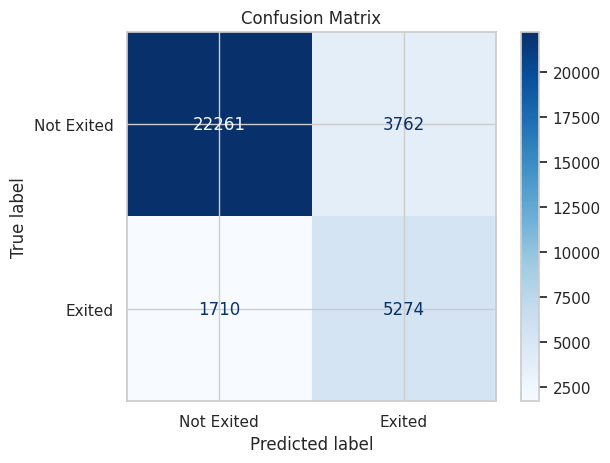

In [25]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create an XGBoost classifier with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**optimal_parameters.best_params_, random_state=42)


# Train the model on the training set
best_xgb_model.fit(X_train, y_train, eval_metric="auc")

# Make predictions on the test set
y_test_pred = best_xgb_model.predict(X_test)

# Evaluate the performance using a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Exited', 'Exited'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [26]:
y_test_proba = best_xgb_model.predict_proba(X_test_encoded)[:, 1]

In [27]:
import pandas as pd
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
sample_submission = sample_submission.drop(['Exited'], axis=1)



sample_submission['Exited'] = y_test_proba
sample_submission.head()

,id,Exited
0,165034,0.076994
1,165035,0.927779
2,165036,0.072010
3,165037,0.457413
4,165038,0.668391


In [28]:
sample_submission.to_csv(r"/kaggle/working/submission.csv", index=False)